<a href="https://colab.research.google.com/github/Marconi-Lab/Bean-disease-screening-project/blob/progress/simple_classification_model/notebooks/classification_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Input, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow import keras

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_ds = datagen.flow_from_directory("/content/drive/MyDrive/bean_disease_project/simple_classification_model/dataset1/train", 
                                      target_size=(224, 224), 
                                      class_mode = "binary", 
                                      batch_size=32)

val_ds = datagen.flow_from_directory("/content/drive/MyDrive/bean_disease_project/simple_classification_model/dataset1/validate",
                                      shuffle=False,
                                      target_size=(224, 224), 
                                      class_mode = "binary", 
                                      batch_size=32)



Found 960 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [ ]:
model = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
flattened = GlobalMaxPooling2D()(model.layers[-1].output)
hidden = Dense(64, activation="relu")(flattened)
dropout = Dropout(0.5)(hidden)
normalized = BatchNormalization()(dropout)
output = Dense(3, activation="softmax")(normalized)
model = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [ ]:
opt = Adam(1e-4)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(train_ds, validation_data=(val_ds), epochs=20)

Epoch 1/20
30/30 [==============================] - 312s 10s/step - loss: 1.2690 - accuracy: 0.4531 - val_loss: 1.7637 - val_accuracy: 0.4167
Epoch 2/20
30/30 [==============================] - 197s 7s/step - loss: 0.8824 - accuracy: 0.6073 - val_loss: 1.1861 - val_accuracy: 0.4750
Epoch 3/20
30/30 [==============================] - 202s 7s/step - loss: 0.7178 - accuracy: 0.6760 - val_loss: 1.0552 - val_accuracy: 0.4667
Epoch 4/20
30/30 [==============================] - 202s 7s/step - loss: 0.5546 - accuracy: 0.7781 - val_loss: 0.9910 - val_accuracy: 0.5417
Epoch 5/20
30/30 [==============================] - 200s 7s/step - loss: 0.4633 - accuracy: 0.8156 - val_loss: 1.0129 - val_accuracy: 0.5000
Epoch 6/20
30/30 [==============================] - 205s 7s/step - loss: 0.3928 - accuracy: 0.8469 - val_loss: 1.0417 - val_accuracy: 0.5167
Epoch 7/20
30/30 [==============================] - 200s 7s/step - loss: 0.3299 - accuracy: 0.8823 - val_loss: 1.0469 - val_accuracy: 0.5667
Epoch 8/20
3

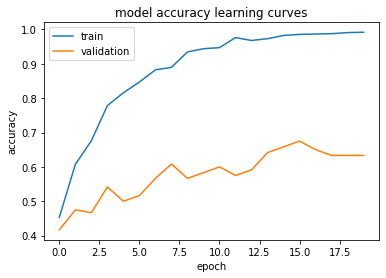

In [ ]:
# accuracy curve
pyplot.plot(history.history["accuracy"])
pyplot.plot(history.history["val_accuracy"])
pyplot.title("model accuracy learning curves")
pyplot.ylabel("accuracy")
pyplot.xlabel("epoch")
pyplot.legend(['train', 'validation'], loc="upper left")
pyplot.show()

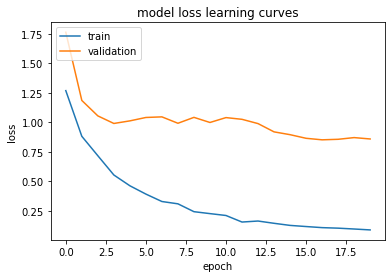

In [ ]:
# accuracy curve
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss learning curves')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

In [ ]:
model.save("/content/drive/MyDrive/bean_disease_project/simple_classification_model/model_moblienet_v1.h5")

In [ ]:
prediction = model.predict(val_ds) # predict probabilities
y_pred = [int(round(i[0])) for i in prediction] # converting probabilities to binary outputs

In [ ]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [ ]:
def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=pyplot.cm.Blues
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = np.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=45)
    pyplot.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j, i, "{:0.2f}".format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
    pyplot.tight_layout()
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')

In [ ]:
target_names = ["angular_leaf_spot", "bean_rust", "healthy"]

In [ ]:
print("Confusion Matrix")
conf_matrix = confusion_matrix(val_ds.classes, y_pred)
print(conf_matrix)

Confusion Matrix
[[15 25  0]
 [30 10  0]
 [39  1  0]]


Normalized confusion matrix
[[0.375 0.625 0.   ]
 [0.75  0.25  0.   ]
 [0.975 0.025 0.   ]]


<function matplotlib.pyplot.show>

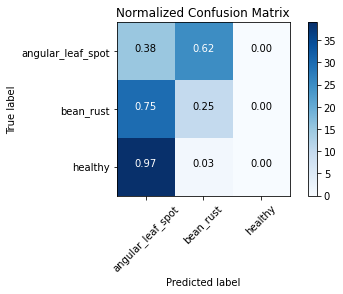

In [ ]:
pyplot.figure(0)
plot_confusion_matrix(conf_matrix, classes=target_names, normalize=True, title="Normalized Confusion Matrix")
pyplot.show

Confusion matrix, without normalization
[[15 25  0]
 [30 10  0]
 [39  1  0]]


<function matplotlib.pyplot.show>

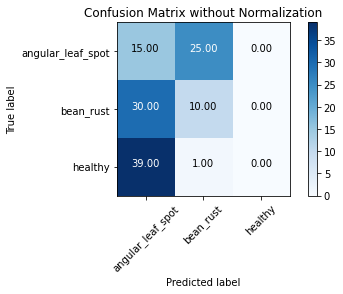

In [ ]:
pyplot.figure(1)
plot_confusion_matrix(conf_matrix, classes=target_names, normalize=False, title="Confusion Matrix without Normalization")
pyplot.show

In [ ]:
print(classification_report(val_ds.classes, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

angular_leaf_spot       0.18      0.38      0.24        40
        bean_rust       0.28      0.25      0.26        40
          healthy       0.00      0.00      0.00        40

         accuracy                           0.21       120
        macro avg       0.15      0.21      0.17       120
     weighted avg       0.15      0.21      0.17       120



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
